In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("EastWestAirlines.xlsx")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [53]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  clust              3999 non-null   int32
dtypes: int32(1), int64(12)
memory usage: 390.7 KB


In [6]:
# here all columns data type is int hence no need to separate the data into categorical and numerical form 
# as all available data is numeric data 

In [8]:
# checking for the null values in the dataset

data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [25]:
colm = data.columns
colm

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [17]:
# counting the count of the data present with respect to every feature 
# In percentage

for col in data.columns:
    print(data[col].value_counts(normalize = True)*100)
    print("-"*50)

1       0.025006
2691    0.025006
2678    0.025006
2679    0.025006
2680    0.025006
          ...   
1351    0.025006
1352    0.025006
1353    0.025006
1354    0.025006
4021    0.025006
Name: ID#, Length: 3999, dtype: float64
--------------------------------------------------
1000     0.250063
500      0.125031
2000     0.125031
1500     0.100025
5000     0.075019
           ...   
9554     0.025006
30130    0.025006
12665    0.025006
9860     0.025006
3016     0.025006
Name: Balance, Length: 3904, dtype: float64
--------------------------------------------------
0       94.348587
1000     0.425106
500      0.375094
967      0.100025
888      0.100025
          ...    
4116     0.025006
1388     0.025006
1896     0.025006
3692     0.025006
1005     0.025006
Name: Qual_miles, Length: 164, dtype: float64
--------------------------------------------------
1    57.239310
3    15.328832
4    13.128282
5     7.201800
2     7.101775
Name: cc1_miles, dtype: float64
---------------------------

In [18]:
# counting the same count of the data present with respect to each feature 

for col in data.columns:
    print(data[col].value_counts())
    print("-"*50)

1       1
2691    1
2678    1
2679    1
2680    1
       ..
1351    1
1352    1
1353    1
1354    1
4021    1
Name: ID#, Length: 3999, dtype: int64
--------------------------------------------------
1000     10
500       5
2000      5
1500      4
5000      3
         ..
9554      1
30130     1
12665     1
9860      1
3016      1
Name: Balance, Length: 3904, dtype: int64
--------------------------------------------------
0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: Qual_miles, Length: 164, dtype: int64
--------------------------------------------------
1    2289
3     613
4     525
5     288
2     284
Name: cc1_miles, dtype: int64
--------------------------------------------------
1    3956
2      28
3      15
Name: cc2_miles, dtype: int64
--------------------------------------------------
1    3981
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64
----------------

# Univariate Analysis - 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7328\3742952395.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = data[colm[i]], shade = True, color = 'b')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7328\3742952395.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = data[colm[i]], shade = True, color = 'b')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7328\3742952395.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = data[colm[i]], shade = True, color = 'b')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7328\3742952395.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This

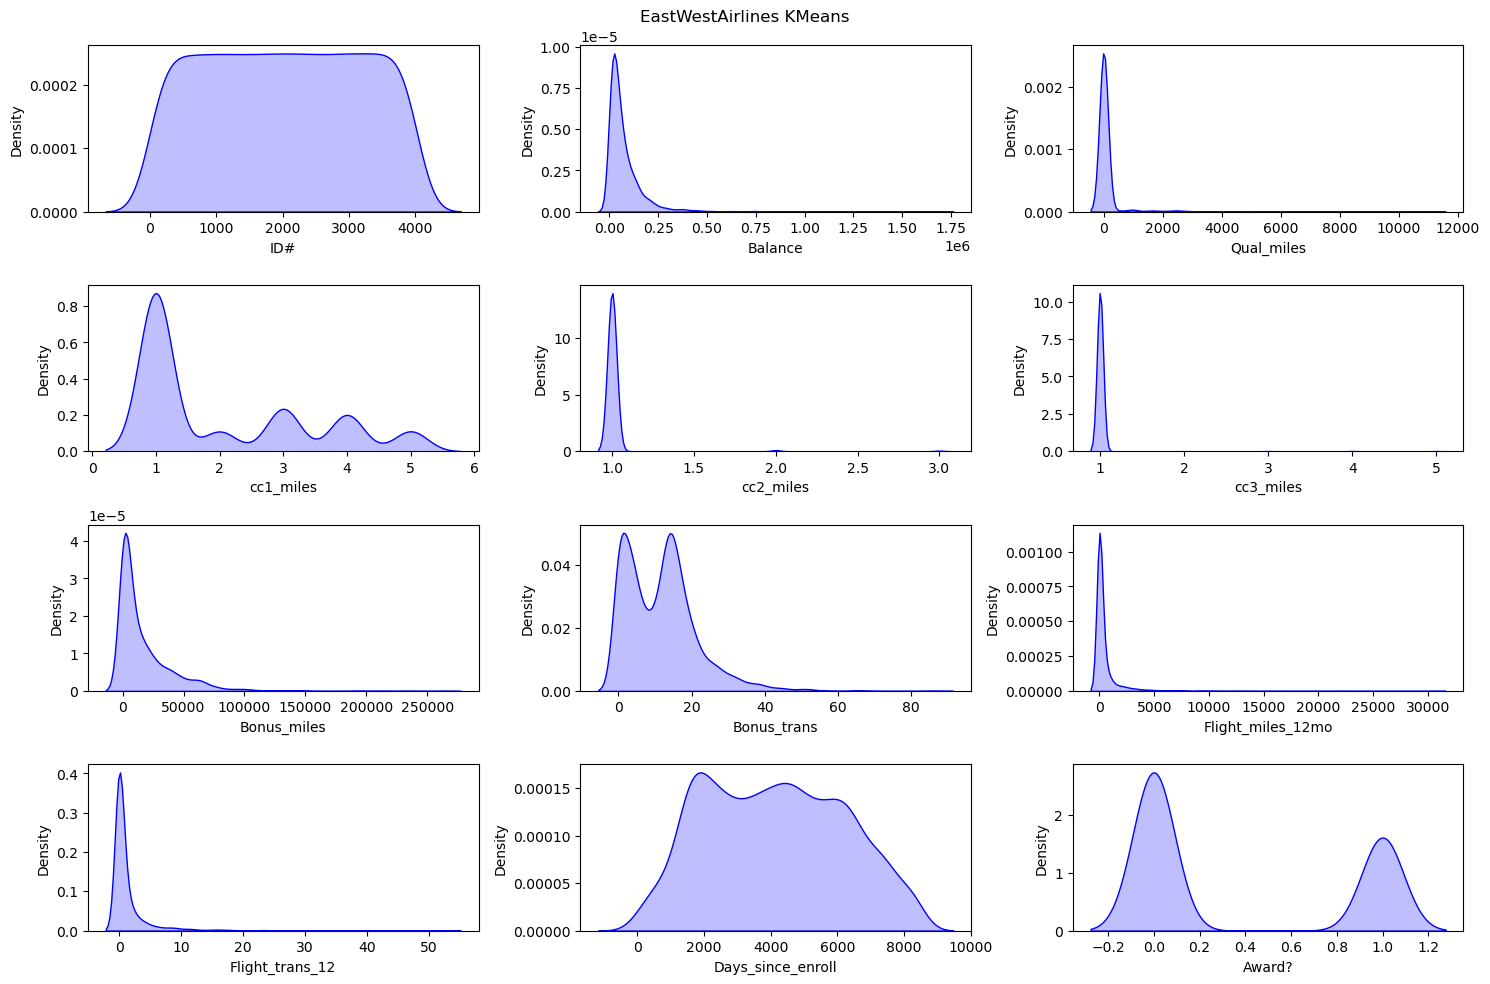

In [30]:
# Plotting KDE plot for understanding the distribution of the data
# Analysing the data with just single feature 
# Analysing tsckewness of the data

plt.figure(figsize=(15,12))
plt.suptitle("EastWestAirlines KMeans")

for i in range(0, len(colm)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = data[colm[i]], shade = True, color = 'b')
    plt.xlabel(colm[i])
    plt.tight_layout()

# Multivariate Analysis of Data -

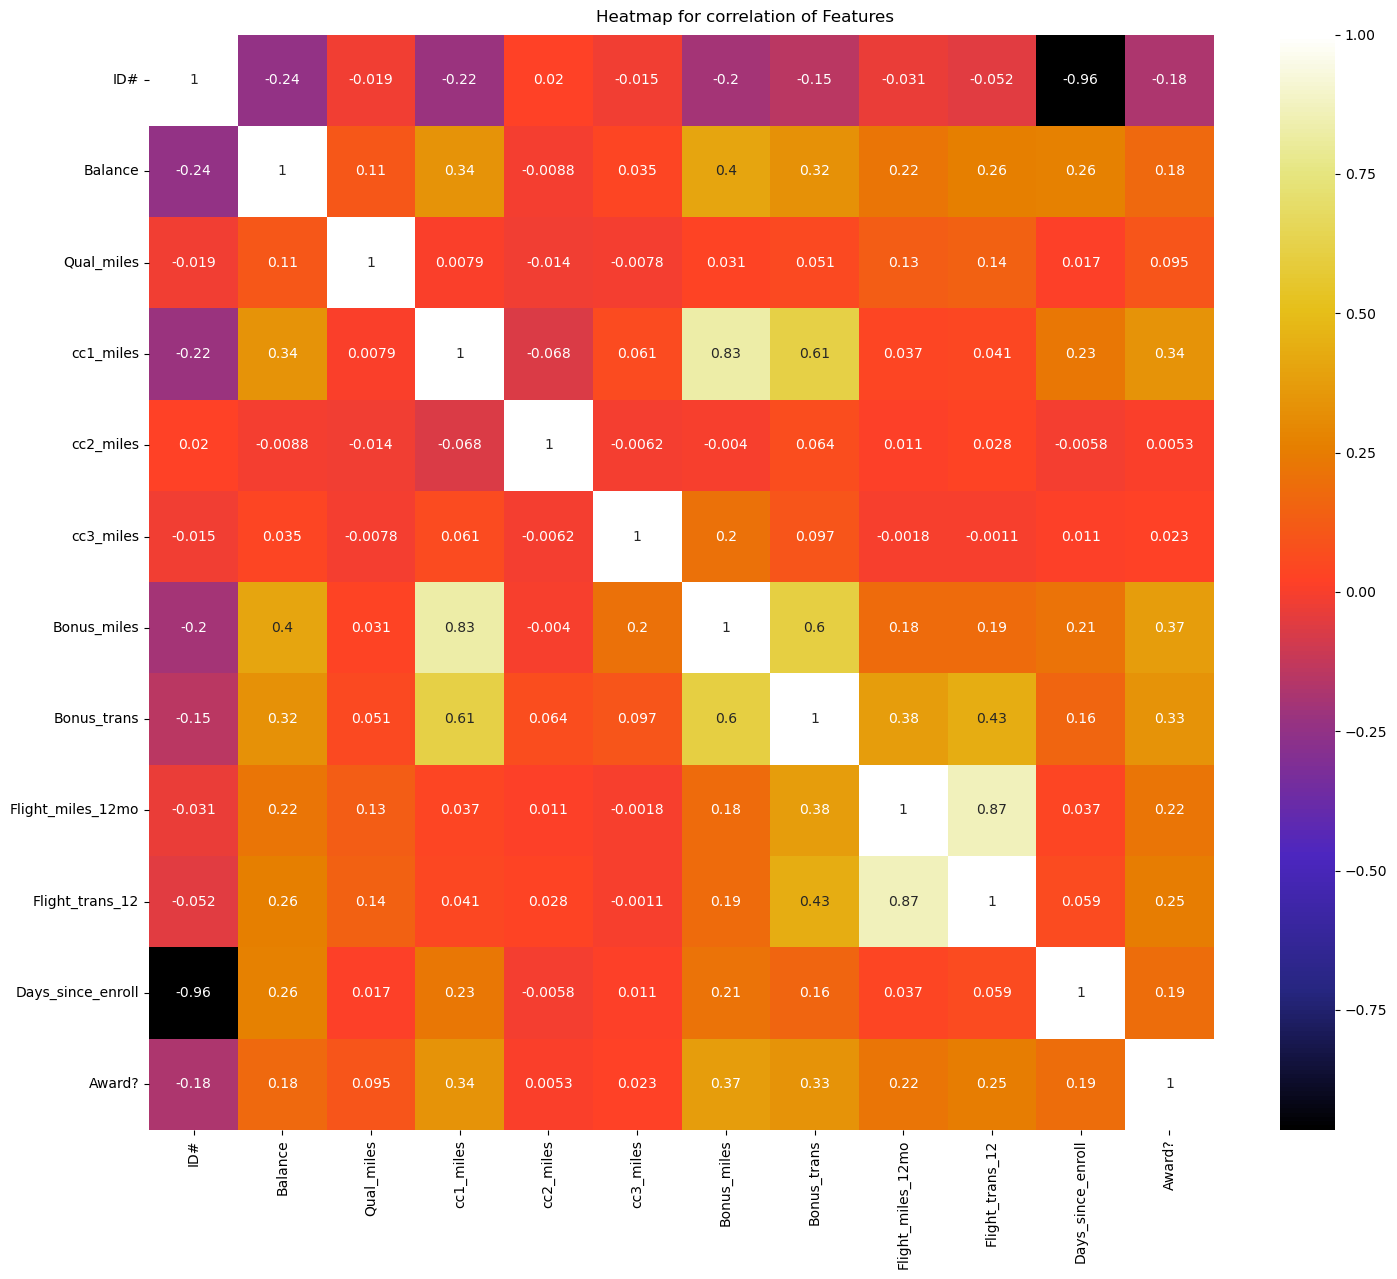

In [33]:
# For analysis of correlation of the features of the data with each other we ussing heatmap
# Visualized analysis of correlation of features

plt.figure(figsize=(15,13))
plt.suptitle("Heatmap for correlation of Features")

sns.heatmap(data.corr(), cmap = 'CMRmap', annot = True)
plt.tight_layout()
plt.show()

In [55]:
# Getting insights on the correlation of the features of the data in tanular form 

data.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901,0.174588
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494,0.087863
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256,0.088742
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457,0.214811
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332,0.008826
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484,0.015390
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506,0.275954
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893,0.242561
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715,0.189986
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909,0.213896


# Applying KMeans clustering -

In [35]:
from sklearn.cluster import KMeans

In [37]:
# Normalizing the data

def norm_funt(i):
    x = (i - i.min())/(i.max()-i.min())
    return x

In [38]:
norm_data = norm_funt(data)
norm_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [43]:
# finding the best number of cluster to perform on the available data

ESS = []
k = list(range(1,10))

for i in k:
    mod = KMeans(n_clusters=i)
    mod.fit(norm_data)
    ESS.append(mod.inertia_)
    
ESS

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_k

[2164.1265977774983,
 1146.4595170935343,
 865.2605940455041,
 673.4748707148151,
 536.204549155658,
 452.2284305074122,
 397.94565945622867,
 346.2280906369084,
 308.51866541058905]

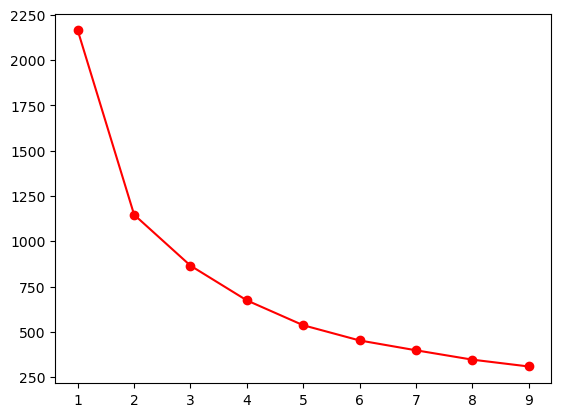

In [44]:
plt.plot(k, ESS, "ro-")

In [45]:
model = KMeans(n_clusters = 3)
model.fit(norm_data)
model.labels_

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 2, 1, 1])

In [47]:
data['clust'] = model.labels_
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [50]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'clust'],
      dtype='object')

In [60]:
data.to_excel("KMeans_EastWestAirlines_Clustered.xlsx", encoding = 'utf-8')
import os
os.getcwd()

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


'C:\\Users\\ASUS'